In [2]:
from pycaret.regression import *
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 

from sklearn.preprocessing import StandardScaler, PowerTransformer, MinMaxScaler
from sklearn.linear_model import *
from sklearn.kernel_ridge import KernelRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import *
from xgboost.sklearn import XGBRegressor
from lightgbm.sklearn import LGBMRegressor
from catboost.core import CatBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, DotProduct
from sklearn_rvm.em_rvm import EMRVR

# MAE, MSE, RMSE
import math
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score

### Check Predicted Age Distribution for Kernel Ridge 

In [2]:
cc_pred_age = pd.read_csv('./dataframe/cc/cc_predicted_age.csv', index_col=0)

In [13]:
cc_pred_age_kr = cc_pred_age[['KernelRidge']]

cc_pred_age_kr.sort_values('KernelRidge', ascending=False)

,KernelRidge
81,171.295270
78,91.610070
72,82.981580
97,82.291016
100,81.820694
92,79.628876
90,79.301320
82,77.649400
80,75.781815
85,75.466170


### check whether there is a difference in the range of the Feature Importance of the Tree family model and the Linear model

In [15]:
ixi_feat_imp = pd.read_csv("./dataframe/ixi/ixi_feat_imp.csv", index_col=0)

In [17]:
ixi_feat_imp.head()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,RANSAC,TheilsenRegressor,HuberRegressor,KernelRidge,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
0,4.823057,3.307069,1.383574,1.807317,2.707378,3.310613,0.000000,1.803386,3.715754,2.492060,5.534789,5.500003,4.687156,5.844687,1.539162,4.823057,0.0,0.001526,0.001191,0.001841,0.014798,0.000666,9,0.741949
1,-0.656311,-1.009856,-0.841883,-0.940638,-1.247201,-1.008514,-2.169182,-0.852474,-0.815640,-0.865524,-0.648933,-0.727428,-0.735206,-0.557315,-0.789823,-0.656311,0.0,0.010227,0.009972,0.007281,0.013866,0.002812,3,0.800914
2,1.211106,0.000000,-0.008885,0.000000,0.000000,0.000000,0.000000,0.089744,0.237069,0.232094,1.579416,1.110312,1.180990,1.490198,-0.035879,1.211106,0.0,0.003430,0.003195,0.002230,0.001502,0.001221,0,0.211639
3,0.996416,0.114570,0.273502,0.000000,0.000000,0.115229,0.000000,0.414413,0.508118,0.701776,1.252211,1.208738,0.984618,0.996375,0.330306,0.996416,0.0,0.002187,0.002295,0.007028,0.007362,0.000796,1,0.308531
4,-1.073162,-0.700632,-0.697345,-0.549445,-0.755117,-0.700226,0.000000,-0.831692,-0.947934,-1.127027,-0.860357,-1.269747,-1.076292,-1.322208,-0.654966,-1.073162,0.0,0.003089,0.003245,0.012924,0.006824,0.001819,9,0.540256


In [ ]:
ixi_feat_imp.columns

In [24]:
linear_list=['LinearRegression','Lasso','Ridge','ElasticNet','Lars','LassoLars','OrthogonalMatchingPursuit','Bayesian Ridge','ARD','PassiveAggressiveRegressor','RANSAC',
            'TheilsenRegressor','HuberRegressor','KernelRidge','SVR','GaussianProcess']
tree_list = ['Decision Tree','RandomForestRegressor','ExtraTreesRegressor','Adaboost','GradientBoostingRegressor','XGBRegressor','LGBMRegressor','Catboost']

In [30]:
for col in linear_list:
    print(f"{col} Feature Importance Range :\n {round(ixi_feat_imp[col].min(),2)} ~ {round(ixi_feat_imp[col].max(),2)}\n")

LinearRegression Feature Importance Range :
 -4.92 ~ 4.82

Lasso Feature Importance Range :
 -3.51 ~ 3.31

Ridge Feature Importance Range :
 -1.48 ~ 1.79

ElasticNet Feature Importance Range :
 -2.31 ~ 2.05

Lars Feature Importance Range :
 -3.15 ~ 2.71

LassoLars Feature Importance Range :
 -3.52 ~ 3.31

OrthogonalMatchingPursuit Feature Importance Range :
 -4.51 ~ 4.06

Bayesian Ridge Feature Importance Range :
 -1.87 ~ 1.86

ARD Feature Importance Range :
 -3.62 ~ 3.72

PassiveAggressiveRegressor Feature Importance Range :
 -2.52 ~ 2.49

RANSAC Feature Importance Range :
 -5.06 ~ 5.53

TheilsenRegressor Feature Importance Range :
 -4.9 ~ 5.5

HuberRegressor Feature Importance Range :
 -4.51 ~ 4.69

KernelRidge Feature Importance Range :
 -5.26 ~ 5.84

SVR Feature Importance Range :
 -1.45 ~ 1.86

GaussianProcess Feature Importance Range :
 -4.92 ~ 4.82



In [31]:
for col in tree_list:
    print(f"{col} Feature Importance Range :\n {round(ixi_feat_imp[col].min(),2)} ~ {round(ixi_feat_imp[col].max(),2)}\n")

Decision Tree Feature Importance Range :
 0.0 ~ 0.48

RandomForestRegressor Feature Importance Range :
 0.0 ~ 0.22

ExtraTreesRegressor Feature Importance Range :
 0.0 ~ 0.15

Adaboost Feature Importance Range :
 0.0 ~ 0.13

GradientBoostingRegressor Feature Importance Range :
 0.0 ~ 0.09

XGBRegressor Feature Importance Range :
 0.0 ~ 0.14

LGBMRegressor Feature Importance Range :
 0 ~ 13

Catboost Feature Importance Range :
 0.03 ~ 9.97



In [38]:
ixi_feat_violin = ixi_feat_imp.copy()

In [39]:
ixi_feat_violin.columns=['lr','lasso','ridge','en','lar','llar','omp','br','ard','par','ransac','tr','huber','kr','svr','gp','dt','rf','et','ada','gbm','xgb','lgbm','catboost']

<AxesSubplot:>

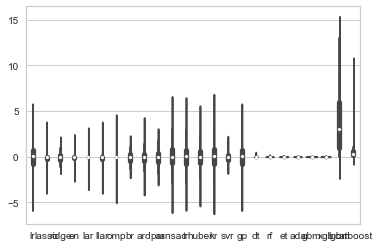

In [43]:
sns.violinplot(data=ixi_feat_violin, figsize=(15,5))

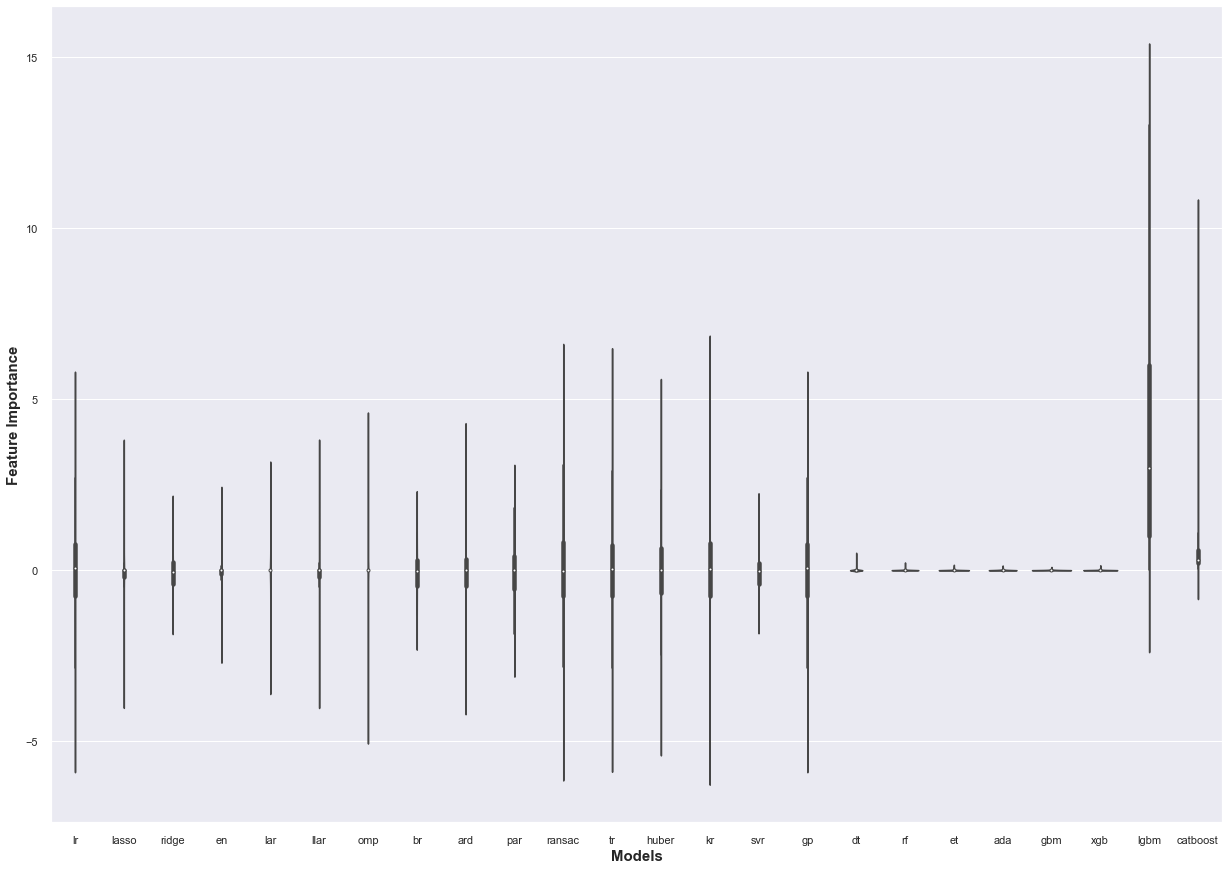

In [44]:
sns.set(rc={'figure.figsize':(21, 15)})

ax = sns.violinplot(data=ixi_feat_violin)
#ax.set_title('IXI Predicted Brain Age', fontsize=25, weight="bold")
ax.set_xlabel('Models', fontsize=15, weight="bold")
ax.set_ylabel('Feature Importance', fontsize=15, weight="bold")
plt.show() 

In [46]:
ixi_feat_violin.astype(bool).sum(axis=0)

lr          153
lasso        76
ridge       153
en           78
lar          52
llar         76
omp          10
br          153
ard         153
par         153
ransac      153
tr          153
huber       153
kr          153
svr         153
gp          153
dt            9
rf          153
et          153
ada         150
gbm         142
xgb         153
lgbm        125
catboost    153
dtype: int64

The number of Feature imports with non-zero value per model. 

As for the Tree Model, it can be seen that almost all of the other models use it except for the Decision Tree Regressor

### How many types of Predicted Age values are there for each model? 

In [51]:
cc_tree_pred_age = cc_pred_age.loc[:,tree_list ]

In [56]:
len(cc_tree_pred_age.iloc[:,0].value_counts())

15

In [58]:
for i in range(len(tree_list)):
    print(f"{cc_tree_pred_age.columns[i]}")
    print(f"Predicted Age Value Types : {len(cc_tree_pred_age.iloc[:, i].value_counts())}\n")

Decision Tree
Predicted Age Value Types : 15

RandomForestRegressor
Predicted Age Value Types : 101

ExtraTreesRegressor
Predicted Age Value Types : 101

Adaboost
Predicted Age Value Types : 87

GradientBoostingRegressor
Predicted Age Value Types : 101

XGBRegressor
Predicted Age Value Types : 101

LGBMRegressor
Predicted Age Value Types : 101

Catboost
Predicted Age Value Types : 101



In [60]:
cc_lin_pred_age = cc_pred_age.loc[:, linear_list]

for i in range(len(linear_list)):
    print(f"{cc_lin_pred_age.columns[i]}")
    print(f"Predicted Age Value Types : {len(cc_lin_pred_age.iloc[:, i].value_counts())}\n")

LinearRegression
Predicted Age Value Types : 101

Lasso
Predicted Age Value Types : 101

Ridge
Predicted Age Value Types : 101

ElasticNet
Predicted Age Value Types : 101

Lars
Predicted Age Value Types : 101

LassoLars
Predicted Age Value Types : 101

OrthogonalMatchingPursuit
Predicted Age Value Types : 101

Bayesian Ridge
Predicted Age Value Types : 101

ARD
Predicted Age Value Types : 101

PassiveAggressiveRegressor
Predicted Age Value Types : 101

RANSAC
Predicted Age Value Types : 101

TheilsenRegressor
Predicted Age Value Types : 101

HuberRegressor
Predicted Age Value Types : 101

KernelRidge
Predicted Age Value Types : 101

SVR
Predicted Age Value Types : 101

GaussianProcess
Predicted Age Value Types : 101



In [63]:
hcp_pred_age = pd.read_csv('./dataframe/hcp/hcp_predicted_age.csv', index_col=0)

hcp_tree_pred_age = hcp_pred_age.loc[:,tree_list ]
hcp_lin_pred_age = hcp_pred_age.loc[:, linear_list]

for i in range(len(tree_list)):
    print(f"{hcp_tree_pred_age.columns[i]}")
    print(f"Predicted Age Value Types : {len(hcp_tree_pred_age.iloc[:, i].value_counts())}\n")
    
for i in range(len(linear_list)):
    print(f"{hcp_lin_pred_age.columns[i]}")
    print(f"Predicted Age Value Types : {len(hcp_lin_pred_age.iloc[:, i].value_counts())}\n")    

Decision Tree
Predicted Age Value Types : 9

RandomForestRegressor
Predicted Age Value Types : 223

ExtraTreesRegressor
Predicted Age Value Types : 223

Adaboost
Predicted Age Value Types : 146

GradientBoostingRegressor
Predicted Age Value Types : 223

XGBRegressor
Predicted Age Value Types : 223

LGBMRegressor
Predicted Age Value Types : 223

Catboost
Predicted Age Value Types : 223

LinearRegression
Predicted Age Value Types : 223

Lasso
Predicted Age Value Types : 223

Ridge
Predicted Age Value Types : 223

ElasticNet
Predicted Age Value Types : 223

Lars
Predicted Age Value Types : 223

LassoLars
Predicted Age Value Types : 223

OrthogonalMatchingPursuit
Predicted Age Value Types : 223

Bayesian Ridge
Predicted Age Value Types : 223

ARD
Predicted Age Value Types : 223

PassiveAggressiveRegressor
Predicted Age Value Types : 223

RANSAC
Predicted Age Value Types : 223

TheilsenRegressor
Predicted Age Value Types : 223

HuberRegressor
Predicted Age Value Types : 223

KernelRidge
Pre

In [64]:
ixi_pred_age = pd.read_csv('./dataframe/ixi/ixi_predicted_age.csv', index_col=0)

ixi_tree_pred_age = ixi_pred_age.loc[:,tree_list ]
ixi_lin_pred_age = ixi_pred_age.loc[:, linear_list]

for i in range(len(tree_list)):
    print(f"{ixi_tree_pred_age.columns[i]}")
    print(f"Predicted Age Value Types : {len(ixi_tree_pred_age.iloc[:, i].value_counts())}\n")
    
for i in range(len(linear_list)):
    print(f"{ixi_lin_pred_age.columns[i]}")
    print(f"Predicted Age Value Types : {len(ixi_lin_pred_age.iloc[:, i].value_counts())}\n")    

Decision Tree
Predicted Age Value Types : 10

RandomForestRegressor
Predicted Age Value Types : 114

ExtraTreesRegressor
Predicted Age Value Types : 114

Adaboost
Predicted Age Value Types : 103

GradientBoostingRegressor
Predicted Age Value Types : 114

XGBRegressor
Predicted Age Value Types : 114

LGBMRegressor
Predicted Age Value Types : 114

Catboost
Predicted Age Value Types : 114

LinearRegression
Predicted Age Value Types : 114

Lasso
Predicted Age Value Types : 114

Ridge
Predicted Age Value Types : 114

ElasticNet
Predicted Age Value Types : 114

Lars
Predicted Age Value Types : 114

LassoLars
Predicted Age Value Types : 114

OrthogonalMatchingPursuit
Predicted Age Value Types : 114

Bayesian Ridge
Predicted Age Value Types : 114

ARD
Predicted Age Value Types : 114

PassiveAggressiveRegressor
Predicted Age Value Types : 114

RANSAC
Predicted Age Value Types : 114

TheilsenRegressor
Predicted Age Value Types : 114

HuberRegressor
Predicted Age Value Types : 114

KernelRidge
Pr

## Feature Importance MinMax Scaling

In [4]:
ixi_feat_imp = pd.read_csv("./dataframe/ixi/ixi_feat_imp.csv", index_col=0)
hcp_feat_imp = pd.read_csv("./dataframe/hcp/hcp_feat_imp.csv", index_col=0)
cc_feat_imp = pd.read_csv("./dataframe/cc/cc_feat_imp.csv", index_col=0)

In [6]:
ixi_feat_imp_copy = ixi_feat_imp.copy()
hcp_feat_imp_copy = hcp_feat_imp.copy()
cc_feat_imp_copy = cc_feat_imp.copy()

In [23]:
def scaling(x, col_max):
    return x / col_max

for col in ixi_feat_imp_copy.columns.to_list():
    ixi_feat_imp_copy[col] = ixi_feat_imp[col].apply(lambda x : abs(x))
    col_max = ixi_feat_imp_copy[col].max()
    ixi_feat_imp_copy[col] = ixi_feat_imp_copy[col].apply(lambda x : scaling(x, col_max))
    
    
for col in hcp_feat_imp_copy.columns.to_list():
    hcp_feat_imp_copy[col] = hcp_feat_imp[col].apply(lambda x : abs(x))
    col_max = hcp_feat_imp_copy[col].max()
    hcp_feat_imp_copy[col] = hcp_feat_imp_copy[col].apply(lambda x : scaling(x, col_max))
    
for col in cc_feat_imp_copy.columns.to_list():
    cc_feat_imp_copy[col] = cc_feat_imp[col].apply(lambda x : abs(x))
    col_max = cc_feat_imp_copy[col].max()
    cc_feat_imp_copy[col] = cc_feat_imp_copy[col].apply(lambda x : scaling(x, col_max))

In [20]:
ixi_feat_imp.head()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,RANSAC,TheilsenRegressor,HuberRegressor,KernelRidge,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
0,4.823057,3.307069,1.383574,1.807317,2.707378,3.310613,0.000000,1.803386,3.715754,2.492060,5.534789,5.500003,4.687156,5.844687,1.539162,4.823057,0.0,0.001526,0.001191,0.001841,0.014798,0.000666,9,0.741949
1,-0.656311,-1.009856,-0.841883,-0.940638,-1.247201,-1.008514,-2.169182,-0.852474,-0.815640,-0.865524,-0.648933,-0.727428,-0.735206,-0.557315,-0.789823,-0.656311,0.0,0.010227,0.009972,0.007281,0.013866,0.002812,3,0.800914
2,1.211106,0.000000,-0.008885,0.000000,0.000000,0.000000,0.000000,0.089744,0.237069,0.232094,1.579416,1.110312,1.180990,1.490198,-0.035879,1.211106,0.0,0.003430,0.003195,0.002230,0.001502,0.001221,0,0.211639
3,0.996416,0.114570,0.273502,0.000000,0.000000,0.115229,0.000000,0.414413,0.508118,0.701776,1.252211,1.208738,0.984618,0.996375,0.330306,0.996416,0.0,0.002187,0.002295,0.007028,0.007362,0.000796,1,0.308531
4,-1.073162,-0.700632,-0.697345,-0.549445,-0.755117,-0.700226,0.000000,-0.831692,-0.947934,-1.127027,-0.860357,-1.269747,-1.076292,-1.322208,-0.654966,-1.073162,0.0,0.003089,0.003245,0.012924,0.006824,0.001819,9,0.540256


In [21]:
ixi_feat_imp_copy.head()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,RANSAC,TheilsenRegressor,HuberRegressor,KernelRidge,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
0,0.980263,0.941476,0.771163,0.782920,0.860014,0.941610,0.000000,0.965806,1.000000,0.989433,1.000000,1.000000,1.000000,1.000000,0.826169,0.980263,0.0,0.007080,0.007957,0.014487,0.160263,0.004818,0.692308,0.074448
1,0.133392,0.287492,0.469241,0.407480,0.396180,0.286843,0.481112,0.456544,0.219509,0.343643,0.117246,0.132260,0.156856,0.095354,0.423950,0.133392,0.0,0.047458,0.066653,0.057278,0.150170,0.020361,0.230769,0.080365
2,0.246151,0.000000,0.004952,0.000000,0.000000,0.000000,0.000000,0.048062,0.063801,0.092149,0.285362,0.201875,0.251963,0.254966,0.019259,0.246151,0.0,0.015916,0.021354,0.017542,0.016272,0.008842,0.000000,0.021236
3,0.202517,0.032616,0.152442,0.000000,0.000000,0.032774,0.000000,0.221939,0.136747,0.278629,0.226244,0.219770,0.210067,0.170475,0.177297,0.202517,0.0,0.010149,0.015338,0.055290,0.079737,0.005765,0.076923,0.030958
4,0.218115,0.199460,0.388679,0.238017,0.239867,0.199159,0.000000,0.445414,0.255112,0.447468,0.155445,0.230863,0.229626,0.226224,0.351563,0.218115,0.0,0.014337,0.021691,0.101674,0.073909,0.013172,0.692308,0.054210


In [22]:
ixi_feat_imp_copy.describe()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,RANSAC,TheilsenRegressor,HuberRegressor,KernelRidge,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.204298,0.099260,0.221894,0.122961,0.090984,0.099184,0.040576,0.252668,0.148735,0.247660,0.193993,0.180240,0.196442,0.171247,0.215800,0.204298,0.013563,0.030331,0.043685,0.051419,0.070787,0.047319,0.292107,0.065582
std,0.179597,0.171692,0.192333,0.198474,0.182815,0.171629,0.163507,0.214867,0.155098,0.202378,0.182682,0.167173,0.175061,0.162679,0.188523,0.179597,0.087379,0.086000,0.107353,0.126111,0.100722,0.098919,0.251647,0.119050
min,0.000066,0.000000,0.004952,0.000000,0.000000,0.000000,0.000000,0.001267,0.000314,0.000785,0.001066,0.000080,0.001916,0.001740,0.001776,0.000066,0.000000,0.006209,0.007957,0.000000,0.000000,0.004818,0.000000,0.002642
25%,0.084360,0.000000,0.075332,0.000000,0.000000,0.000000,0.000000,0.087240,0.049586,0.077553,0.061109,0.072067,0.076053,0.065022,0.071891,0.084360,0.000000,0.011536,0.012944,0.006383,0.022118,0.014266,0.076923,0.021716
50%,0.156442,0.000000,0.159878,0.006443,0.000000,0.000000,0.000000,0.194087,0.105185,0.202458,0.141066,0.136534,0.140951,0.131449,0.168160,0.156442,0.000000,0.015054,0.015966,0.015950,0.044160,0.021332,0.230769,0.031455
75%,0.269275,0.138771,0.291858,0.196164,0.114646,0.137421,0.000000,0.369227,0.200126,0.344371,0.269218,0.233074,0.277315,0.227280,0.311598,0.269275,0.000000,0.020065,0.025458,0.047353,0.081502,0.038066,0.461538,0.059332
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [29]:
hcp_feat_imp_copy.describe()

,LinearRegression,Lasso,Ridge,ElasticNet,Lars,LassoLars,OrthogonalMatchingPursuit,Bayesian Ridge,ARD,PassiveAggressiveRegressor,RANSAC,TheilsenRegressor,HuberRegressor,KernelRidge,SVR,GaussianProcess,Decision Tree,RandomForestRegressor,ExtraTreesRegressor,Adaboost,GradientBoostingRegressor,XGBRegressor,LGBMRegressor,Catboost
count,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000,153.000000
mean,0.059232,0.049811,0.291080,0.243045,0.052335,0.049775,0.046179,0.233529,0.043866,0.197349,0.054838,0.057360,0.059805,0.060275,0.304994,0.059232,0.020387,0.108813,0.231031,0.218574,0.222174,0.255391,0.204991,0.232225
std,0.087564,0.097858,0.219000,0.190110,0.098335,0.097829,0.096566,0.183011,0.087892,0.160348,0.086340,0.087863,0.087146,0.087771,0.223891,0.087564,0.111507,0.101542,0.151192,0.202954,0.145806,0.126891,0.216184,0.161740
min,0.000500,0.000000,0.007063,0.000667,0.000000,0.000000,0.000000,0.000142,0.000157,0.000758,0.000104,0.000086,0.000005,0.000787,0.001972,0.000500,0.000000,0.031412,0.098157,0.000000,0.046267,0.079250,0.000000,0.036245
25%,0.021361,0.000000,0.113708,0.083805,0.000000,0.000000,0.000000,0.084135,0.007816,0.071519,0.021566,0.018438,0.021914,0.020708,0.129104,0.021361,0.000000,0.066361,0.154921,0.076009,0.134395,0.178408,0.045455,0.122857
50%,0.043910,0.014040,0.237291,0.200303,0.023184,0.014008,0.000000,0.191243,0.023922,0.152863,0.039842,0.040620,0.044239,0.043107,0.246267,0.043910,0.000000,0.083906,0.180658,0.152763,0.181721,0.233323,0.136364,0.183891
75%,0.079864,0.068482,0.441569,0.386936,0.075031,0.068462,0.079240,0.372472,0.059830,0.291738,0.065881,0.076639,0.081395,0.085684,0.453997,0.079864,0.000000,0.115666,0.232306,0.287476,0.270696,0.306325,0.363636,0.283489
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [30]:
def save_feat_heatmap(age_feat_imp, dataset, save_file_name, vmin=None, vmax=None):
    plt.figure(figsize=(15,10))

    dataplot = sns.heatmap(age_feat_imp, vmin=vmin, vmax=vmax, cmap="YlGnBu", annot=False, square=True)
    plt.title(f'{dataset} Feature Importance Correlation', fontsize=20, y=1.05)
    plt.tight_layout()
    plt.savefig(f'./visualization/Scaling_{save_file_name}.png', dpi=300)

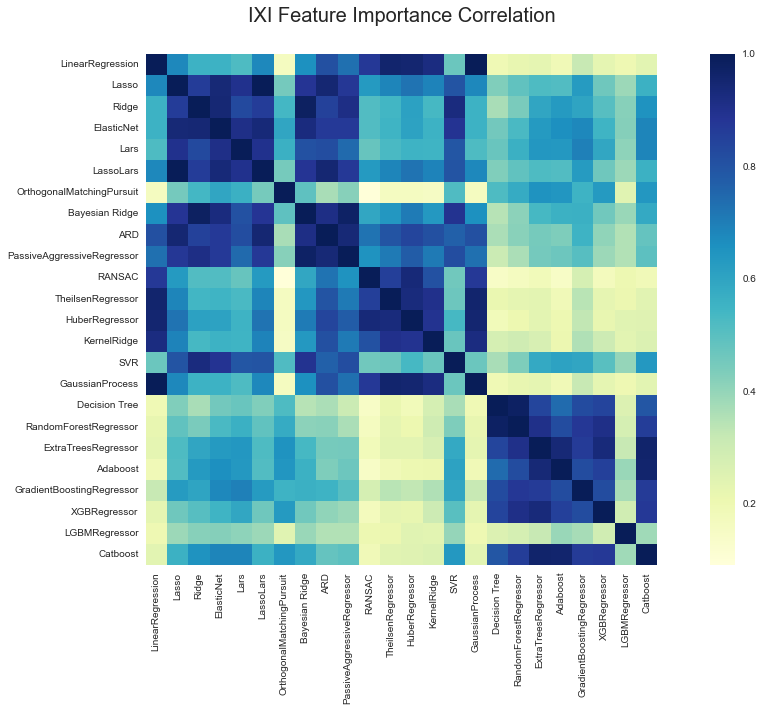

In [31]:
save_feat_heatmap(ixi_feat_imp_copy.corr(), 'IXI', 'ixi_feat_imp')

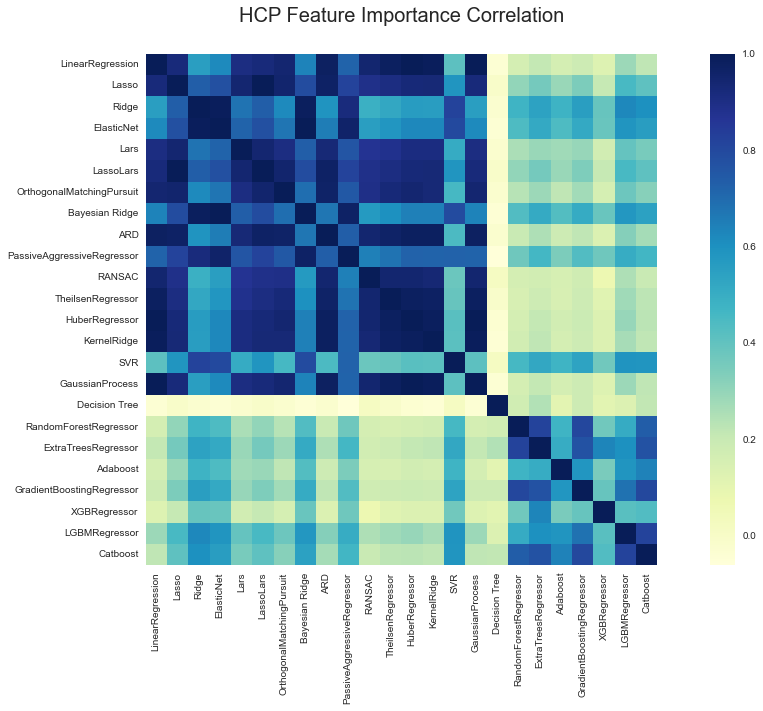

In [32]:
save_feat_heatmap(hcp_feat_imp_copy.corr(), 'HCP', 'hcp_feat_imp')

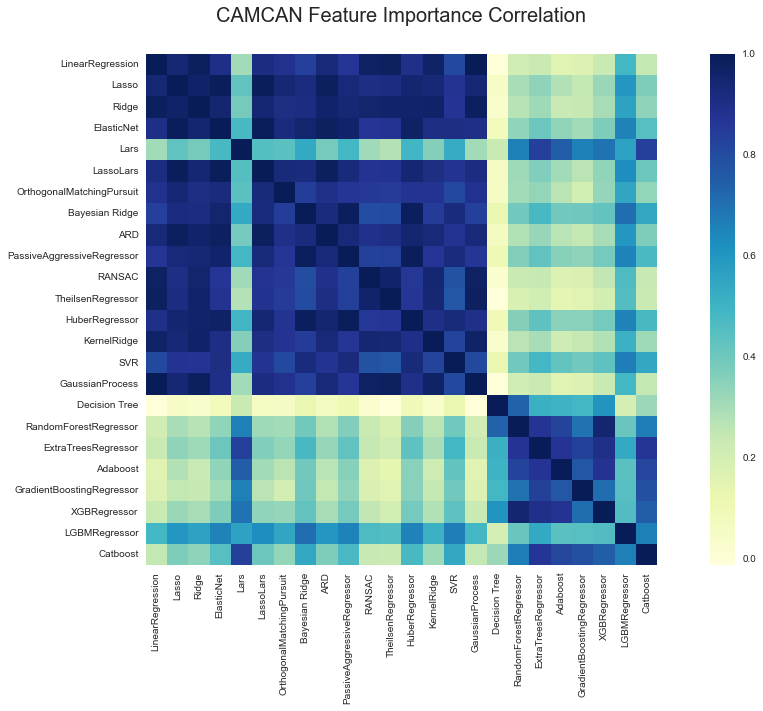

In [33]:
save_feat_heatmap(cc_feat_imp_copy.corr(), 'CAMCAN', 'cc_feat_imp')

In [3]:
def save_feat_clustermap(age_feat_imp, dataset, save_file_name):
    g = sns.clustermap(age_feat_imp, cmap='YlGnBu', col_cluster=True, figsize=(16,16),square=True, vmin=0, vmax=1)
    #g.fig.suptitle(f'{dataset} Feature Importance Hierachical Clustering', y=0.92, fontsize=20)
    x0, _y0, _w, _h = g.cbar_pos
    g.ax_cbar.set_position([1.05, 0.3, 0.02, 0.3])
    g.ax_cbar.set_title('Feature Importance Correlation', x=3.5, y=0.15, loc='right', rotation=90)
    g.savefig(f'./visualization/{save_file_name}.png', bbox_inches='tight',pad_inches = 0, dpi=300)